In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("./star_classification.csv")

In [4]:
data.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [5]:
data.shape

(100000, 18)

In [6]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 18)


In [7]:
data.count()

obj_ID         100000
alpha          100000
delta          100000
u              100000
g              100000
r              100000
i              100000
z              100000
run_ID         100000
rerun_ID       100000
cam_col        100000
field_ID       100000
spec_obj_ID    100000
class          100000
redshift       100000
plate          100000
MJD            100000
fiber_ID       100000
dtype: int64

In [8]:
print(data.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [9]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [10]:
#for categorical
data.describe(include=['O']) 

,class
count,100000
unique,3
top,GALAXY
freq,59445


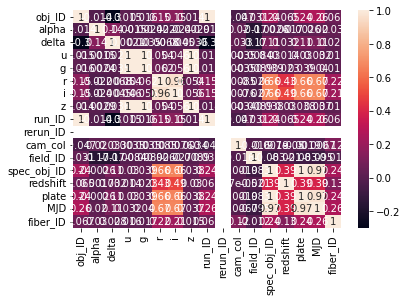

In [11]:
sns.heatmap(data.corr(), annot=True);

получается корреляция, выкенем сразу чтобы только одно осталось 

In [12]:
df = data.drop(['u','g','run_ID','MJD','plate'],axis=1)

<AxesSubplot:>

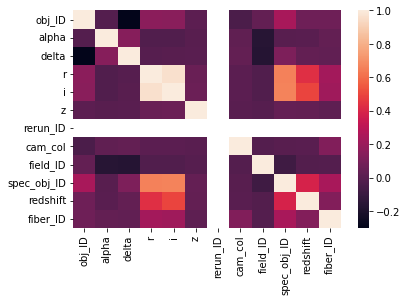

In [13]:
sns.heatmap(df.corr())

In [14]:
df = df.drop(['i','rerun_ID'],axis=1)

<AxesSubplot:>

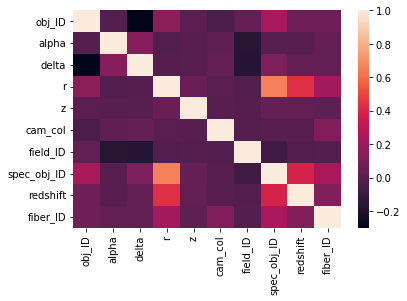

In [15]:
sns.heatmap(df.corr())

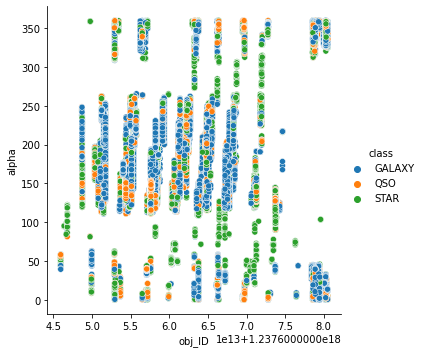

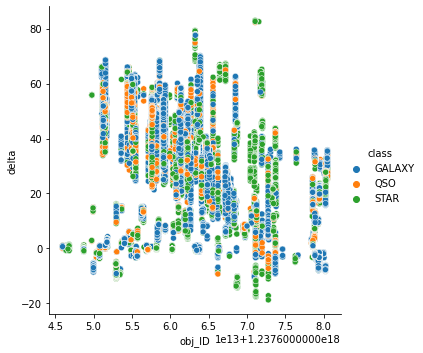

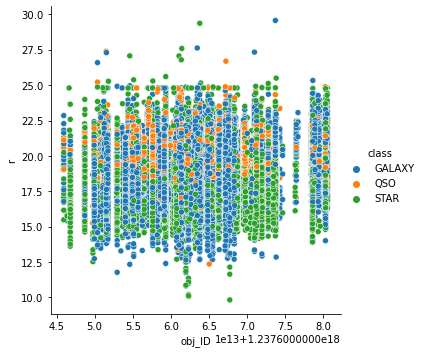

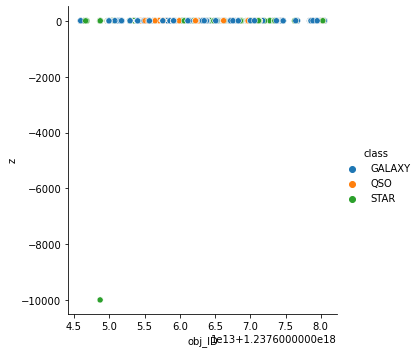

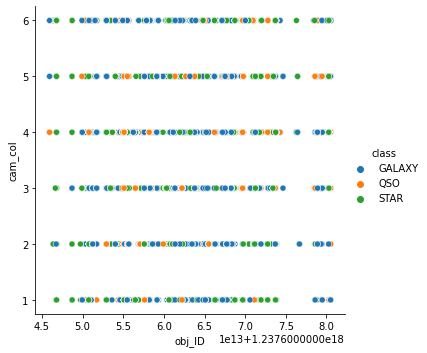

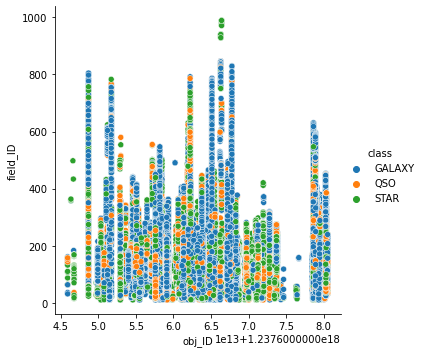

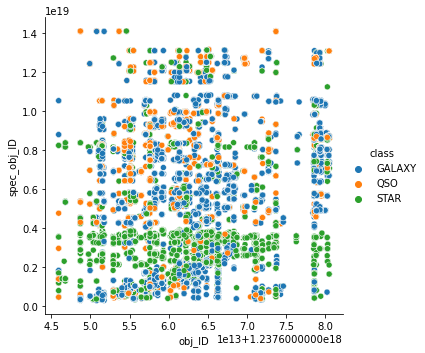

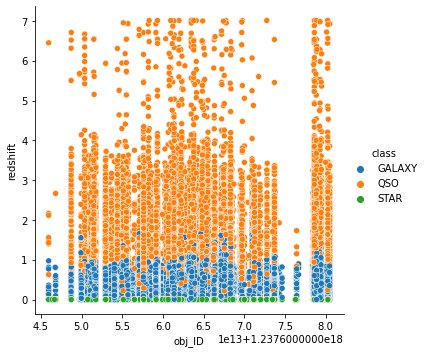

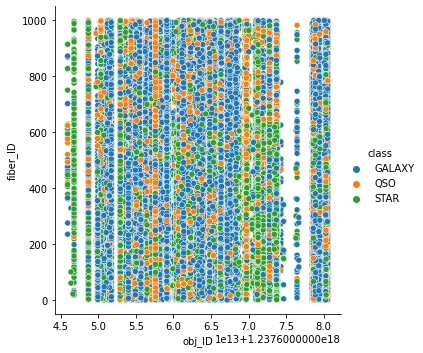

In [16]:
#comparing variations of different attributes with 'obj_ID'
plots=[]
for i in ['alpha', 'delta', 'r', 'z', 'cam_col',
    'field_ID', 'spec_obj_ID', 'redshift', 'fiber_ID']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g);

_**redshift**_ очевидно сильнее всего отображает класс наблюдаемых объектов.

_**cam_col**_ можно выкинуть.

_**z**_ какой то выброс надо будет убрать

In [17]:
df = df.drop('cam_col', axis=1)

выбросы

<AxesSubplot:xlabel='z'>

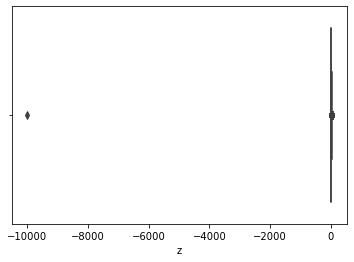

In [18]:
sns.boxplot(x=df.z)

In [19]:
df.shape

(100000, 10)

In [20]:
df=df[df.z>-8000]

In [21]:
df.shape

(99999, 10)

<AxesSubplot:xlabel='z'>

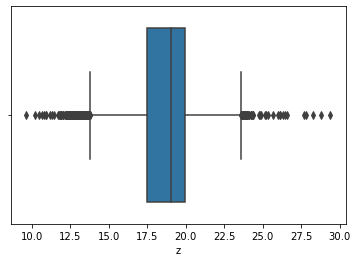

In [22]:
sns.boxplot(x=df.z)

In [23]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

obj_ID         2.309637e+13
alpha          2.148046e+02
delta          4.610600e+01
r              4.113038e+00
z              3.925855e+00
field_ID       2.560000e+02
spec_obj_ID    7.768788e+18
redshift       1.074839e+00
fiber_ID       6.510000e+02
dtype: float64


In [24]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(96395, 10)

_**redshift**_ со всеми проверить, посмотреть прикольно же

In [25]:
df1.head()

,obj_ID,alpha,delta,r,z,field_ID,spec_obj_ID,class,redshift,fiber_ID
0,1.237661e+18,135.689107,32.494632,20.39501,18.79371,79,6.543777e+18,GALAXY,0.634794,171
1,1.237665e+18,144.826101,31.274185,22.58444,21.61427,119,1.176014e+19,GALAXY,0.779136,427
2,1.237661e+18,142.188790,35.582444,20.60976,18.94827,120,5.152200e+18,GALAXY,0.644195,299
3,1.237663e+18,338.741038,-0.402828,21.61162,19.25010,214,1.030107e+19,GALAXY,0.932346,775
4,1.237680e+18,345.282593,21.183866,16.49747,15.54461,137,6.891865e+18,GALAXY,0.116123,842


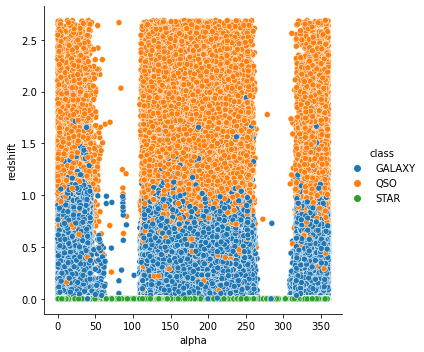

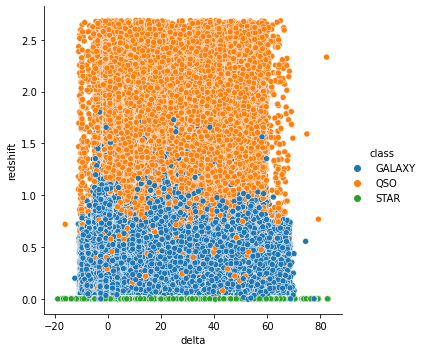

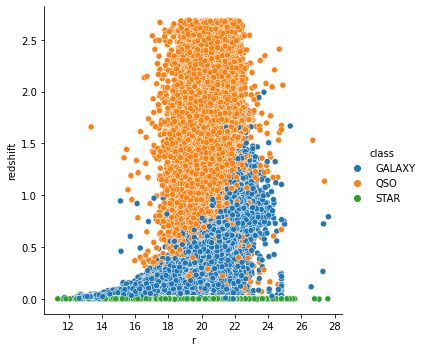

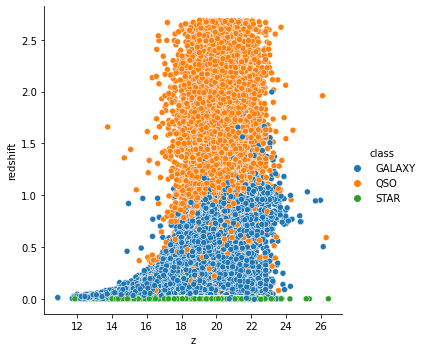

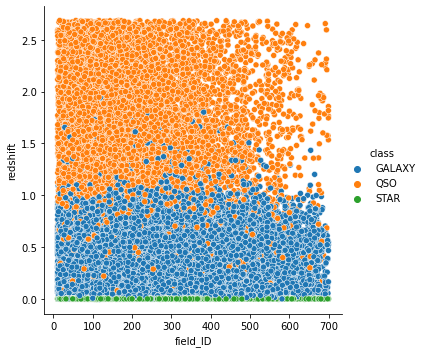

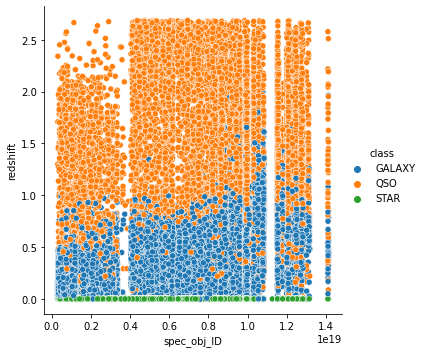

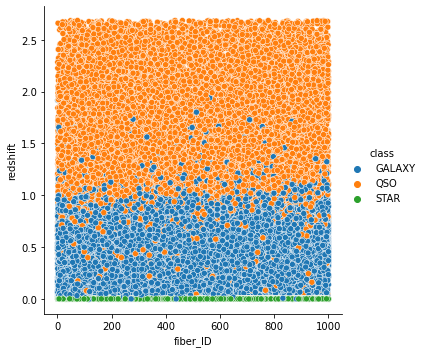

In [26]:
plots=[]
for i in ['alpha', 'delta', 'r', 'z',
    'field_ID', 'spec_obj_ID', 'fiber_ID']:
    g=sns.relplot(data=df1, x=i, y='redshift', hue='class')
    plots.append(g);

начинаем **ВОССТАНИЕ** машин

In [27]:
finale_data = df1.copy()
finale_data.head()

,obj_ID,alpha,delta,r,z,field_ID,spec_obj_ID,class,redshift,fiber_ID
0,1.237661e+18,135.689107,32.494632,20.39501,18.79371,79,6.543777e+18,GALAXY,0.634794,171
1,1.237665e+18,144.826101,31.274185,22.58444,21.61427,119,1.176014e+19,GALAXY,0.779136,427
2,1.237661e+18,142.188790,35.582444,20.60976,18.94827,120,5.152200e+18,GALAXY,0.644195,299
3,1.237663e+18,338.741038,-0.402828,21.61162,19.25010,214,1.030107e+19,GALAXY,0.932346,775
4,1.237680e+18,345.282593,21.183866,16.49747,15.54461,137,6.891865e+18,GALAXY,0.116123,842


забыл нормализацию

In [28]:
from sklearn import preprocessing

In [29]:
finale_data['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [30]:
uncategoring_prekol = {"class": {"GALAXY": 1, "QSO": 2, "STAR": 3}}

In [31]:
finale_data = finale_data.replace(uncategoring_prekol)
finale_data.head()

,obj_ID,alpha,delta,r,z,field_ID,spec_obj_ID,class,redshift,fiber_ID
0,1.237661e+18,135.689107,32.494632,20.39501,18.79371,79,6.543777e+18,1,0.634794,171
1,1.237665e+18,144.826101,31.274185,22.58444,21.61427,119,1.176014e+19,1,0.779136,427
2,1.237661e+18,142.188790,35.582444,20.60976,18.94827,120,5.152200e+18,1,0.644195,299
3,1.237663e+18,338.741038,-0.402828,21.61162,19.25010,214,1.030107e+19,1,0.932346,775
4,1.237680e+18,345.282593,21.183866,16.49747,15.54461,137,6.891865e+18,1,0.116123,842


In [32]:
print(finale_data.isnull().sum())
#print(df.isnull().sum()) 

obj_ID         0
alpha          0
delta          0
r              0
z              0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
fiber_ID       0
dtype: int64


In [33]:
finale_data.head()

,obj_ID,alpha,delta,r,z,field_ID,spec_obj_ID,class,redshift,fiber_ID
0,1.237661e+18,135.689107,32.494632,20.39501,18.79371,79,6.543777e+18,1,0.634794,171
1,1.237665e+18,144.826101,31.274185,22.58444,21.61427,119,1.176014e+19,1,0.779136,427
2,1.237661e+18,142.188790,35.582444,20.60976,18.94827,120,5.152200e+18,1,0.644195,299
3,1.237663e+18,338.741038,-0.402828,21.61162,19.25010,214,1.030107e+19,1,0.932346,775
4,1.237680e+18,345.282593,21.183866,16.49747,15.54461,137,6.891865e+18,1,0.116123,842


In [34]:
y = finale_data.pop('class')

In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [36]:
finale_data.head()

,obj_ID,alpha,delta,r,z,field_ID,spec_obj_ID,redshift,fiber_ID
0,1.237661e+18,135.689107,32.494632,20.39501,18.79371,79,6.543777e+18,0.634794,171
1,1.237665e+18,144.826101,31.274185,22.58444,21.61427,119,1.176014e+19,0.779136,427
2,1.237661e+18,142.188790,35.582444,20.60976,18.94827,120,5.152200e+18,0.644195,299
3,1.237663e+18,338.741038,-0.402828,21.61162,19.25010,214,1.030107e+19,0.932346,775
4,1.237680e+18,345.282593,21.183866,16.49747,15.54461,137,6.891865e+18,0.116123,842


In [37]:
scaler = preprocessing.MinMaxScaler()

names = finale_data.columns
d = scaler.fit_transform(finale_data)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,obj_ID,alpha,delta,r,z,field_ID,spec_obj_ID,redshift,fiber_ID
0,0.434203,0.376905,0.503802,0.555634,0.508443,0.098837,0.451585,0.239073,0.170170
1,0.547496,0.402286,0.491812,0.690165,0.690058,0.156977,0.828833,0.292594,0.426426
2,0.434203,0.394960,0.534139,0.568830,0.518395,0.158430,0.350946,0.242559,0.298298
3,0.506985,0.940947,0.180600,0.630389,0.537830,0.295058,0.723313,0.349403,0.774775
4,0.992503,0.959118,0.392679,0.316148,0.299234,0.183140,0.476759,0.046754,0.841842


In [38]:
X = scaled_df.drop('obj_ID', axis=1)

In [39]:
X.head()

,alpha,delta,r,z,field_ID,spec_obj_ID,redshift,fiber_ID
0,0.376905,0.503802,0.555634,0.508443,0.098837,0.451585,0.239073,0.170170
1,0.402286,0.491812,0.690165,0.690058,0.156977,0.828833,0.292594,0.426426
2,0.394960,0.534139,0.568830,0.518395,0.158430,0.350946,0.242559,0.298298
3,0.940947,0.180600,0.630389,0.537830,0.295058,0.723313,0.349403,0.774775
4,0.959118,0.392679,0.316148,0.299234,0.183140,0.476759,0.046754,0.841842


вот теперь точно начинаем

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

### roc auc visualisation

кароче так как три класса, стандартный рок_аук скор чета не получилось завести, нашел на гитхабе такое

In [56]:
from sklearn.metrics import roc_auc_score

In [45]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [46]:
def get_all_roc_coordinates(y_real, y_proba):
        '''
        Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
        
        Args:
            y_real: The list or series with the real classes.
            y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
            
        Returns:
            tpr_list: The list of TPRs representing each threshold.
            fpr_list: The list of FPRs representing each threshold.
        '''
        tpr_list = [0]
        fpr_list = [0]
        for i in range(len(y_proba)):
            threshold = y_proba[i]
            y_pred = y_proba >= threshold
            tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
            tpr_list.append(tpr)
            fpr_list.append(fpr)
        return tpr_list, fpr_list

In [47]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


### logistic regression

In [43]:
# # Create first pipeline for base without reducing features.

# pipe = Pipeline([('classifier' , RandomForestClassifier())])
# # pipe = Pipeline([('classifier', RandomForestClassifier())])

# # Create param grid.

# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['liblinear']}
# #     {'classifier' : [RandomForestClassifier()],
# #     'classifier__n_estimators' : list(range(10,101,10)),
# #     'classifier__max_features' : list(range(6,32,5))}
# ]

# # Create grid search object

# clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=3, n_jobs=-1)

# # Fit on data

# best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 4/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l1, classifier__solver=liblinear;, score=0.606 total time=   0.2s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=0.0001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.606 total time=   0.3s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l1, classifier__solver=liblinear;, score=0.606 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l2, classifier__solver=liblinear;, score=0.606 total time=   0.3s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=0.00026366508987303583, classifier__penalty=l2, classifier__solver=liblinear;, score=0.606 total time=   0.3s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=0.0006951927961775605, classifier__penalty=l2, classifier__s

In [44]:
#clf.best_params_

{'classifier': LogisticRegression(C=10000.0, penalty='l1', solver='liblinear'),
 'classifier__C': 10000.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [ ]:
# clf.best_params_
# {'classifier': LogisticRegression(C=10000.0, penalty='l1', solver='liblinear'),
#  'classifier__C': 10000.0,
#  'classifier__penalty': 'l1',
#  'classifier__solver': 'liblinear'}

In [46]:
logreg = LogisticRegression(C=10000.0, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=10000.0, penalty='l1', solver='liblinear')

In [71]:
y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95     19246
           2       0.91      0.85      0.88      5587
           3       0.98      0.95      0.96      6978

    accuracy                           0.94     31811
   macro avg       0.94      0.92      0.93     31811
weighted avg       0.94      0.94      0.94     31811



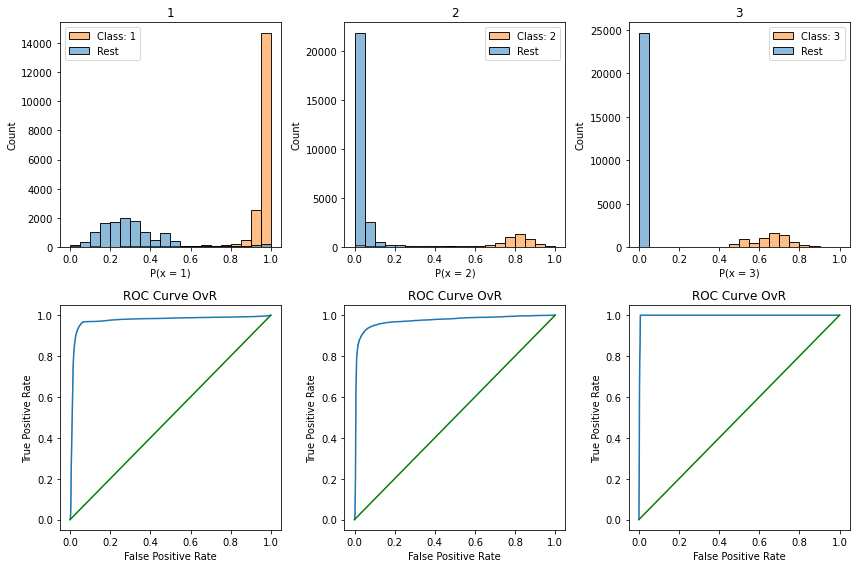

In [70]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = logreg.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_log[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

### KNN

In [48]:
knn_pipe = Pipeline([('classifier', KNeighborsClassifier())])

params = [{'classifier' : [KNeighborsClassifier()],
           'classifier__n_neighbors': [3,5,7,9],
           'classifier__weights': ['uniform', 'distance'],
           'classifier__leaf_size': [15,20,25,30,35]}
         ]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5,
                      n_jobs=-1)

best_knn = gs_knn.fit(X_train, y_train)

In [49]:
# best_knn.best_params_
# {'classifier': KNeighborsClassifier(leaf_size=15, weights='distance'),
#  'classifier__leaf_size': 15,
#  'classifier__n_neighbors': 5,
#  'classifier__weights': 'distance'}

{'classifier': KNeighborsClassifier(leaf_size=15, weights='distance'),
 'classifier__leaf_size': 15,
 'classifier__n_neighbors': 5,
 'classifier__weights': 'distance'}

In [76]:
knn_class=KNeighborsClassifier(leaf_size=15, n_neighbors= 5, weights='distance')
knn_class.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=15, weights='distance')

In [77]:
y_pred_knn = knn_class.predict(X_test)
y_proba_knn = knn_class.predict_proba(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.91      0.96      0.94     19246
           2       0.97      0.81      0.88      5587
           3       0.92      0.90      0.91      6978

    accuracy                           0.92     31811
   macro avg       0.93      0.89      0.91     31811
weighted avg       0.92      0.92      0.92     31811



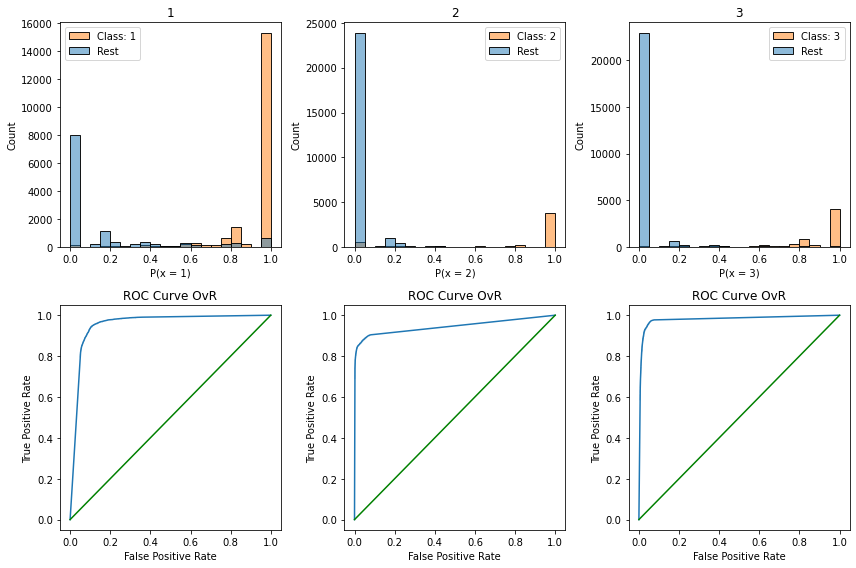

In [78]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = knn_class.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_knn[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

### SVM

In [79]:
from sklearn.svm import SVC

In [51]:
svm_pipe = Pipeline([('classifier', RandomForestClassifier())])

svm_params = [{'classifier' : [SVC()],
           'classifier__C': [-4,-2,2,4],
           'classifier__kernel': ['linear', 'poly', 'rbf'],
           'classifier__gamma': ['scale','auto'],
           'classifier__tol': [1e-2],
           'classifier__class_weight': ['balanced']}
         ]

gs_svm = GridSearchCV(svm_pipe,
                      param_grid = svm_params,
                      scoring = 'accuracy',
                      cv = 5,
                      verbose = True,
                      n_jobs = -1)

best_svm = gs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [46]:
# best_svm.best_params_
# {'classifier': SVC(C=1, class_weight='balanced', kernel='linear'),
#  'classifier__C': 1,
#  'classifier__class_weight': 'balanced',
#  'classifier__gamma': 'scale',
#  'classifier__kernel': 'linear'}

{'classifier': SVC(C=1, class_weight='balanced', kernel='linear'),
 'classifier__C': 1,
 'classifier__class_weight': 'balanced',
 'classifier__gamma': 'scale',
 'classifier__kernel': 'linear'}

In [84]:
svm_class=SVC(C=1, class_weight='balanced', kernel='linear', gamma='scale', probability=True)
svm_class.fit(X_train,y_train)

SVC(C=1, class_weight='balanced', kernel='linear', probability=True)

In [86]:
y_pred_svm = svm_class.predict(X_test)
y_proba_svm = svm_class.predict_proba(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.97      0.91      0.94     19246
           2       0.86      0.89      0.88      5587
           3       0.89      1.00      0.94      6978

    accuracy                           0.93     31811
   macro avg       0.91      0.94      0.92     31811
weighted avg       0.93      0.93      0.93     31811



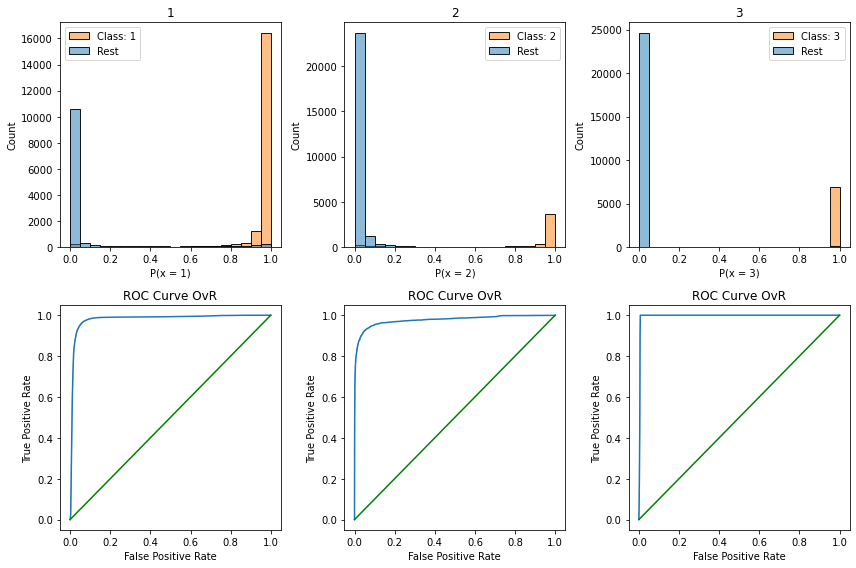

In [87]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = svm_class.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_svm[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

### Naive Bayes

In [52]:
bayes_pipe = Pipeline([('classifier', GaussianNB())])

bayes_params = [{'classifier' : [GaussianNB()],
           'classifier__var_smoothing': [1e-10, 1e-9, 1e-6, 1e-5, 1e-4]}
         ]

gs_bayes = GridSearchCV(bayes_pipe,
                      param_grid = bayes_params,
                      scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)

best_bayes = gs_bayes.fit(X_train, y_train)

In [53]:
best_bayes.best_params_

{'classifier': GaussianNB(var_smoothing=1e-05),
 'classifier__var_smoothing': 1e-05}

In [54]:
bayes_class = GaussianNB(var_smoothing=1e-05)
bayes_class.fit(X_train, y_train)
y_pred_bayes = bayes_class.predict(X_test)
y_proba_bayes = bayes_class.predict_proba(X_test)
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.95      0.88      0.91     19246
           2       0.69      0.83      0.75      5587
           3       0.97      1.00      0.99      6978

    accuracy                           0.90     31811
   macro avg       0.87      0.90      0.88     31811
weighted avg       0.91      0.90      0.90     31811



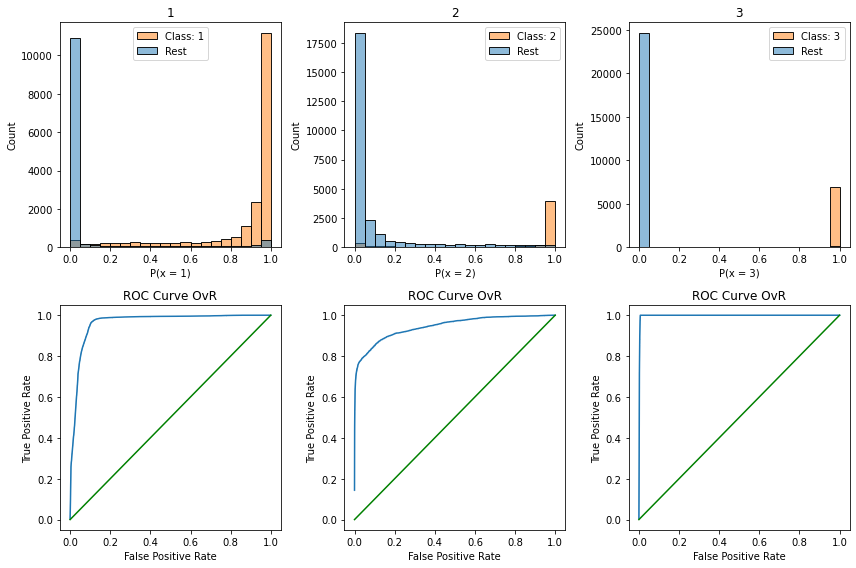

In [57]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = bayes_class.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_bayes[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

### Decision tree

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
tree_pipe = Pipeline([('classifier', DecisionTreeClassifier())])

tree_params = [{'classifier' : [DecisionTreeClassifier()],
           'classifier__criterion': ['gini','entropy'],
           'classifier__splitter': ['best', 'random'],
           'classifier__max_depth': [5,10,20,40,80,150],
           'classifier__class_weight': ['balanced']}
          ]

gs_tree = GridSearchCV(tree_pipe,
                      param_grid = tree_params,
                      scoring = 'accuracy',
                      cv = 5,
                      verbose = 3,
                      n_jobs = -1)

best_tree = gs_tree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [117]:
best_tree.best_params_

{'classifier': DecisionTreeClassifier(class_weight='balanced', max_depth=10),
 'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 10,
 'classifier__splitter': 'best'}

In [58]:
class_tree = tree.DecisionTreeClassifier(class_weight = 'balanced', criterion='gini',max_depth=10,splitter='best')
class_tree = class_tree.fit(X_train, y_train)
#tree.plot_tree(class_tree);

In [59]:
y_pred_tree = class_tree.predict(X_test)
y_proba_tree = class_tree.predict_proba(X_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     19246
           2       0.89      0.91      0.90      5587
           3       0.99      1.00      0.99      6978

    accuracy                           0.96     31811
   macro avg       0.95      0.96      0.95     31811
weighted avg       0.96      0.96      0.96     31811



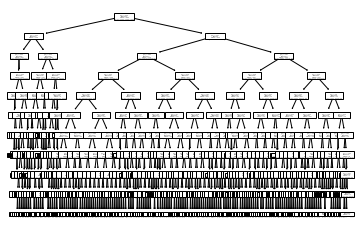

In [122]:
tree.plot_tree(class_tree);

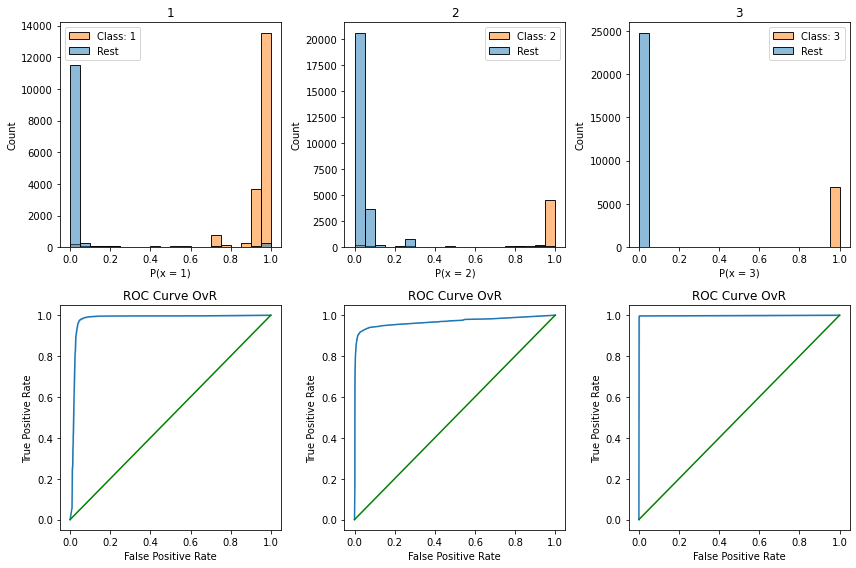

In [60]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = class_tree.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_tree[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

### random forest

In [125]:
forest_pipe = Pipeline([('classifier', RandomForestClassifier())])

forest_params = [{'classifier' : [RandomForestClassifier()],
                'classifier__n_estimators': [10,100,500],
                'classifier__criterion': ['gini','entropy'],
                'classifier__max_features': ['log2'],
                'classifier__max_depth': [1,3,7],
                'classifier__class_weight': ['balanced','balanced_subsample']}
          ]

gs_forest = GridSearchCV(forest_pipe,
                      param_grid = forest_params,
                      scoring = 'accuracy',
                      cv = 5,
                      verbose = 3,
                      n_jobs = -1)

best_forest = gs_forest.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 3/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=10;, score=0.805 total time=   0.3s
[CV 2/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=100;, score=0.823 total time=   2.9s
[CV 5/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=100;, score=0.827 total time=   2.9s
[CV 4/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=500;, score=0.816 total time=  14.2s
[CV 3/5] END cl

[CV 4/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=10;, score=0.802 total time=   0.3s
[CV 3/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=100;, score=0.826 total time=   3.0s
[CV 1/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=500;, score=0.836 total time=  14.3s
[CV 5/5] END classifier=RandomForestClassifier(), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=1, classifier__max_features=log2, classifier__n_estimators=500;, score=0.829 total time=  14.2s
[CV 2/5] END classifier=RandomForestClassifier(), classifier__class_weight=ba

In [126]:
best_forest.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=7, max_features='log2', n_estimators=500),
 'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 7,
 'classifier__max_features': 'log2',
 'classifier__n_estimators': 500}

In [129]:
best_forest.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=7,
                                        max_features='log2',
                                        n_estimators=500))])

In [61]:
forest_class = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features='log2', n_estimators=500)
forest_class.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features='log2', n_estimators=500)

In [62]:
y_pred_forest = forest_class.predict(X_test)
y_proba_forest = forest_class.predict_proba(X_test)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97     19246
           2       0.90      0.91      0.91      5587
           3       0.98      1.00      0.99      6978

    accuracy                           0.96     31811
   macro avg       0.95      0.96      0.96     31811
weighted avg       0.96      0.96      0.96     31811



In [132]:
forest_feature_imp = pd.Series(forest_class.feature_importances_, X_train.columns)

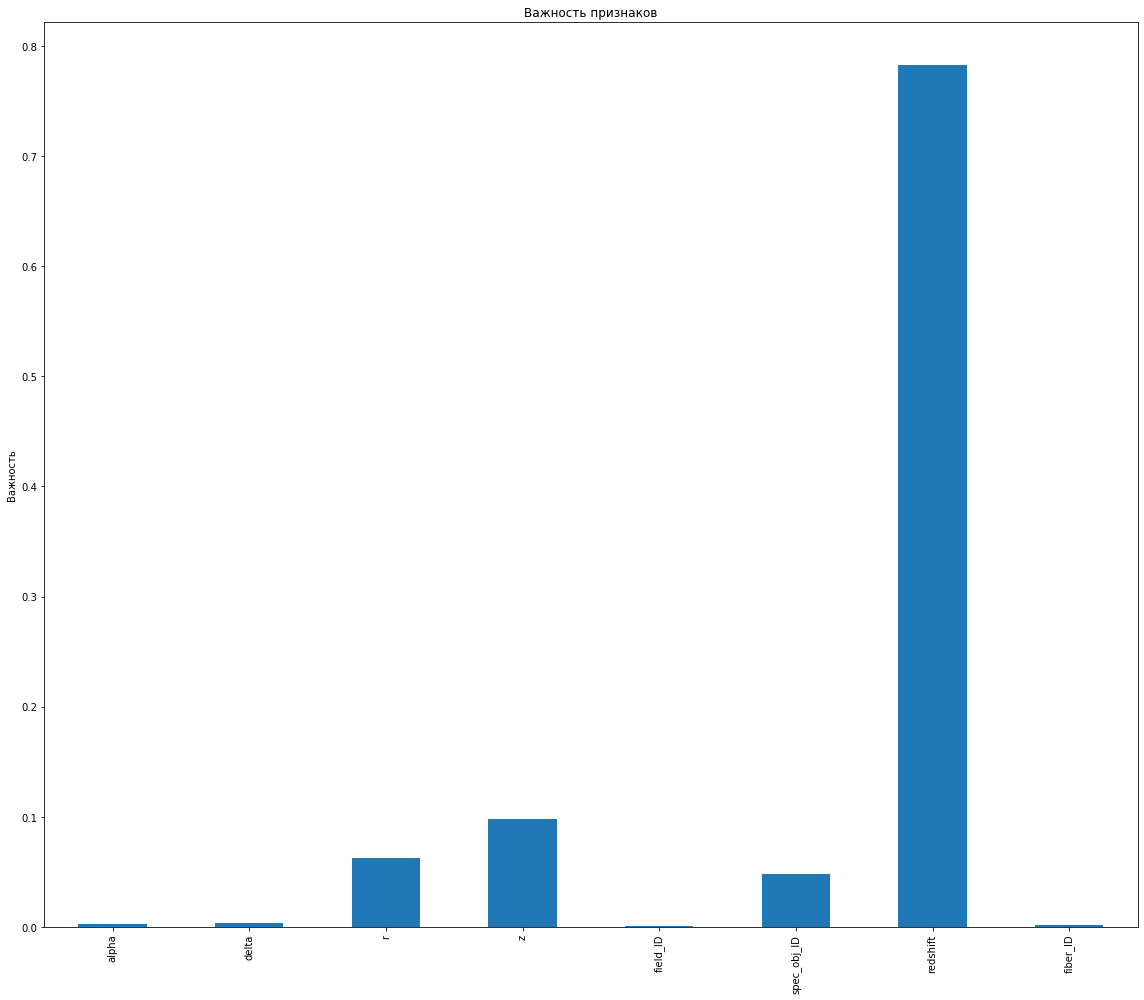

In [133]:
fig, ax = plt.subplots(figsize=(16,14))
forest_feature_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

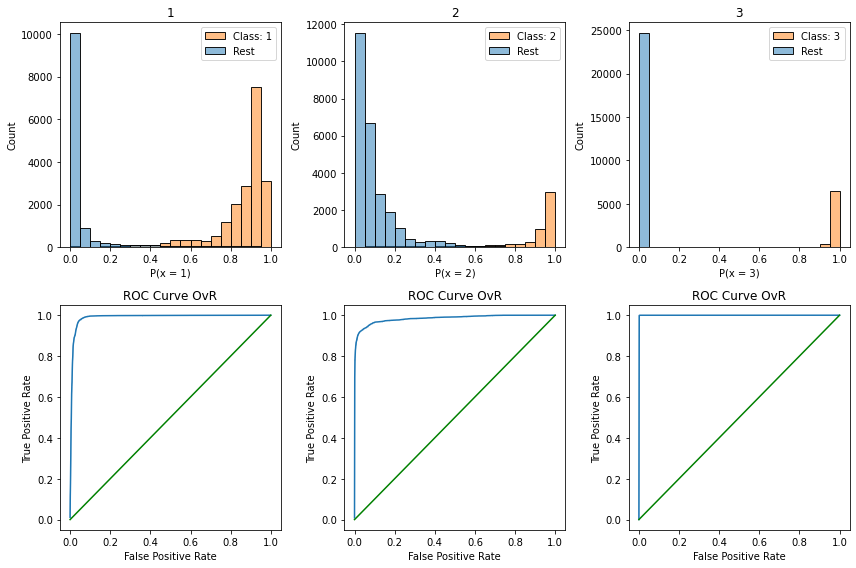

In [63]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = forest_class.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_forest[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

### XGBoost

In [66]:
xgboost_pipe = Pipeline([('classifier', GradientBoostingClassifier())])

xgboost_params = [{'classifier' : [GradientBoostingClassifier()],
                'classifier__n_estimators': [10,100,500],
                'classifier__criterion': ['squared_error'],
                'classifier__loss': ['log_loss'],
                'classifier__learning_rate':[0.1],  
                'classifier__max_features': ['log2'],
                'classifier__max_depth': [3,7]}
          ]

gs_xgboost = GridSearchCV(xgboost_pipe,
                      param_grid = xgboost_params,
                      scoring = 'accuracy',
                      cv = 5,
                      verbose = 3,
                      n_jobs = -1)

best_xgboost = gs_xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 2/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=10;, score=0.923 total time=   2.7s
[CV 3/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100;, score=0.965 total time=  23.8s
[CV 2/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.972 total time= 1.9min
[CV 1/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log

[CV 3/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=10;, score=0.934 total time=   2.4s
[CV 5/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=10;, score=0.934 total time=   2.6s
[CV 4/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100;, score=0.966 total time=  23.0s
[CV 3/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, 

[CV 4/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=10;, score=0.933 total time=   2.4s
[CV 2/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100;, score=0.966 total time=  23.3s
[CV 1/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.972 total time= 1.9min
[CV 5/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt,

[CV 4/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=10;, score=0.645 total time=   3.0s
[CV 5/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=10;, score=0.369 total time=   3.1s
[CV 1/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=100;, score=0.409 total time=  31.4s
[CV 2/5] END classifier=GradientBoostingClassifier(), classifier__criterion=friedman_mse, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=log2, clas

[CV 5/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.976 total time= 3.9min
[CV 4/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=0.1, classifier__loss=log_loss, classifier__max_depth=7, classifier__max_features=log2, classifier__n_estimators=500;, score=0.973 total time= 5.3min
[CV 5/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=100;, score=0.963 total time=  22.2s
[CV 3/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=1, classifier__loss=log_loss, classifier__max_depth=3, classifier__max_features=sqrt

[CV 3/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=100;, score=0.493 total time=  48.8s
[CV 5/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=100;, score=0.456 total time=  50.2s
[CV 3/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=7, classifier__max_features=sqrt, classifier__n_estimators=500;, score=0.651 total time= 4.1min
[CV 2/5] END classifier=GradientBoostingClassifier(), classifier__criterion=squared_error, classifier__learning_rate=10, classifier__loss=log_loss, classifier__max_depth=7, classifier__max_features=log2

In [67]:
best_xgboost.best_params_

{'classifier': GradientBoostingClassifier(criterion='squared_error', max_depth=7,
                            max_features='log2', n_estimators=500),
 'classifier__criterion': 'squared_error',
 'classifier__learning_rate': 0.1,
 'classifier__loss': 'log_loss',
 'classifier__max_depth': 7,
 'classifier__max_features': 'log2',
 'classifier__n_estimators': 500}

In [65]:
XGBoost_class = GradientBoostingClassifier(criterion='squared_error', max_depth=7,
                            max_features='log2', n_estimators=500)

In [66]:
XGBoost_class.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=7,
                           max_features='log2', n_estimators=500)

In [67]:
y_pred_xgboost = XGBoost_class.predict(X_test)
y_proba_xgboost = XGBoost_class.predict_proba(X_test)
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98     19246
           2       0.95      0.90      0.93      5587
           3       0.99      1.00      1.00      6978

    accuracy                           0.97     31811
   macro avg       0.97      0.96      0.97     31811
weighted avg       0.97      0.97      0.97     31811



In [48]:
boosting_feature_imp = pd.Series(XGBoost_class.feature_importances_, X_train.columns)

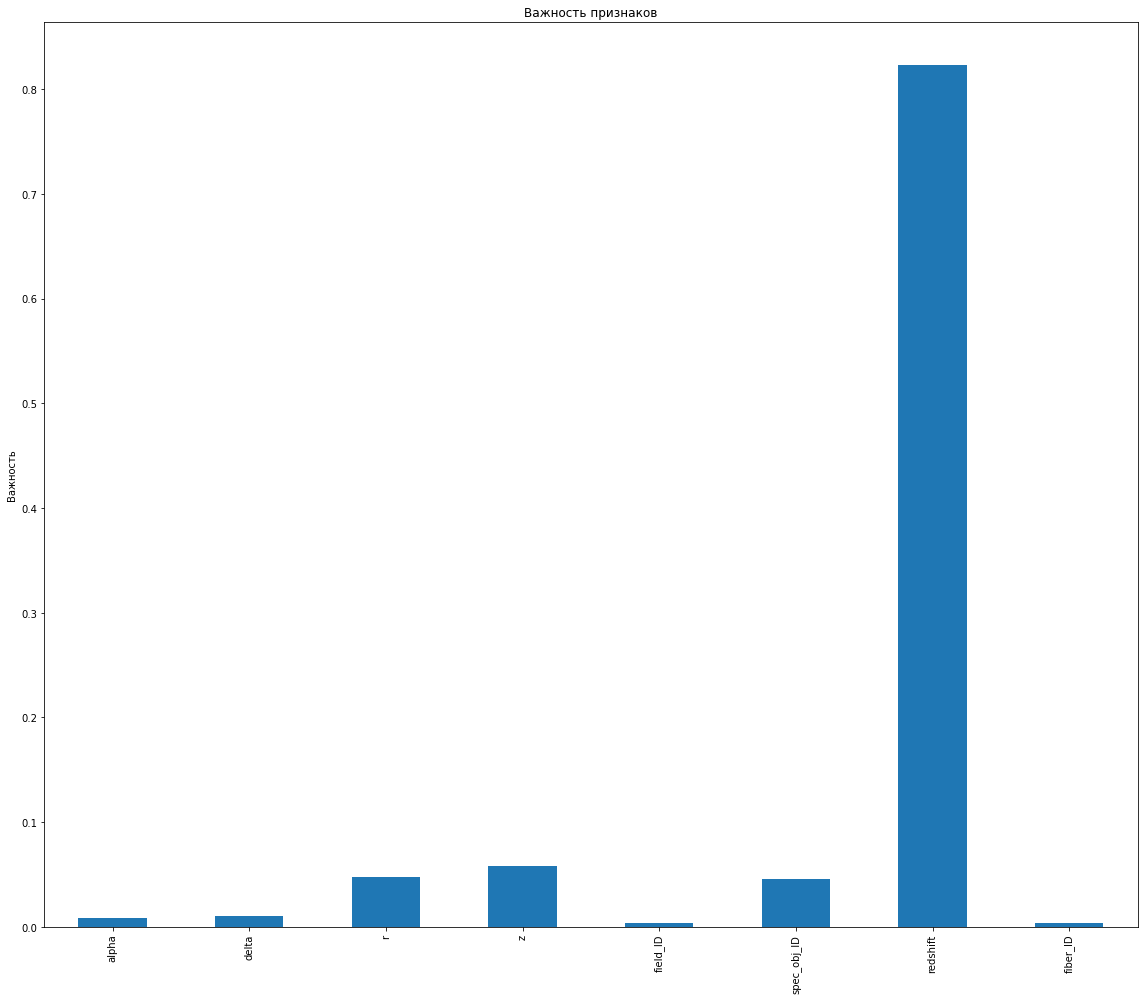

In [49]:
fig, ax = plt.subplots(figsize=(16,14))
boosting_feature_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

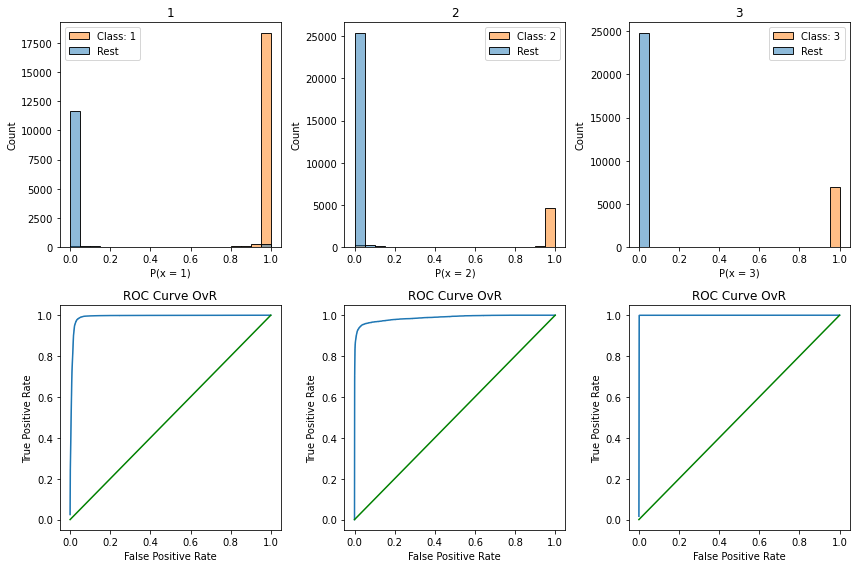

In [68]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = XGBoost_class.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_xgboost[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()